<a href="https://colab.research.google.com/github/evgeny-kolonsky/DCmanual/blob/main/Lab2_Inductance_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab2 Inductance

Evgeny Kolonsky Feb - June 2023 - 2025

v0.1.1


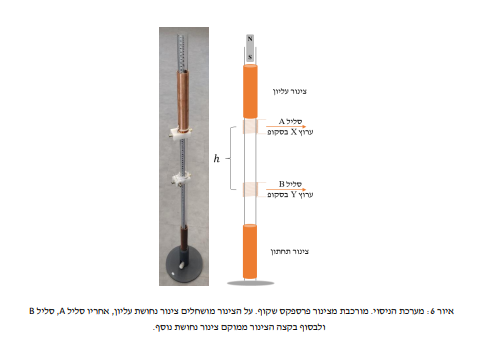

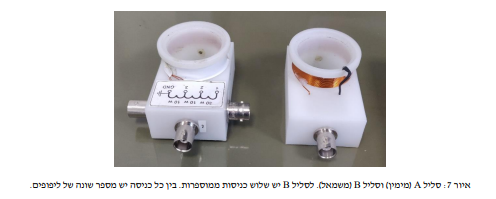

In [55]:
!pip install uncertainties

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid as cumtrapz
from scipy.stats import linregress
import scipy.constants
from uncertainties import ufloat

# Direct measurements

Average magnetization measured by Teslameter = (8.70+/-0.07)e+05 A/m


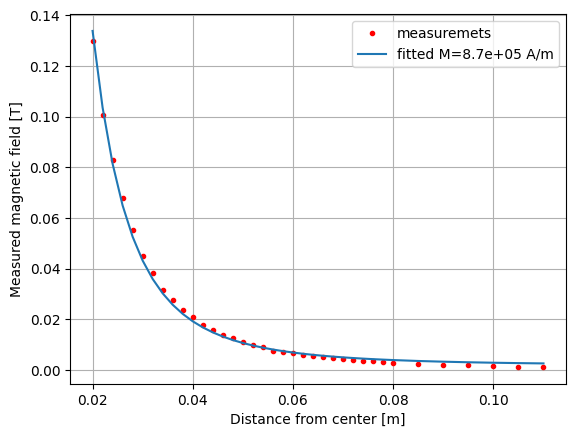

In [57]:
url = f'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab2_I/'

def get_vectors(fullpath):
    t, X, Y = np.genfromtxt(fullpath, delimiter=',', skip_header=1, unpack=True)
    return t, X, Y

def geometric_factor(z):
    return (z + h/2) / np.sqrt((z + h/2)**2 + b**2) - (z - h/2)/np.sqrt((z - h/2)**2 + b**2)


h = 2e-2 # magnet height, in m
b = 1e-2 # magnet radius, in m
D = 35e-3 # diameter of coils, im m
A = np.pi*(D/2)**2 # area of each winding, in m**2

mu_0 = scipy.constants.mu_0

filename = 'Magnetic_Field_Measurement.csv'
z_measured, B_measured =  np.genfromtxt(url+filename, skip_header=1, delimiter=',',unpack=True)

fit = linregress(geometric_factor(z_measured), 2 * B_measured / mu_0)
plt.plot(z_measured, B_measured, 'r.', label='measuremets')
plt.xlabel('Distance from center [m]')
plt.ylabel('Measured magnetic field [T]')
plt.grid()

M = fit.slope
M0 = fit.intercept
M_err = fit.stderr
M_measured = ufloat(M, M_err)
plt.plot(z_measured, M * mu_0 /2 *geometric_factor(z_measured) + M0 *mu_0/2, label=f'fitted M={M:.1e} A/m')
plt.legend()



print(f"Average magnetization measured by Teslameter = {M_measured:.ue} A/m")

## Metadata

- Trace 0 : up, N=50, h=36-11
- Trace 1 : down, N=50, h=36-11
- Trace 2 : up, N=20, h=36-11
- Trace 3 : down, N=20, h=36-11
- Trace 4 : up, N=10, h=36-11
- Trace 5 : down, N=10, h=36-11
- Trace 6 : up, N=50, h=20-11
- Trace 7 : up, N=50, h=24-11
- Trace 8 : up, N=50, h=28-11
- Trace 9 : up, N=50, h=32-11
- Trace 10: up, N=50, h=36-11
- Trace 11: up, N=50, h=40-11
- Trace 12: up, N=50, h=44-11
- Trace 13: up, N=50, h=48-11
- Trace 14: up, N=50, h=52-11
- Trace 15: up, N=50, h=56-11
- Trace 16: up, N=50, h=60-11

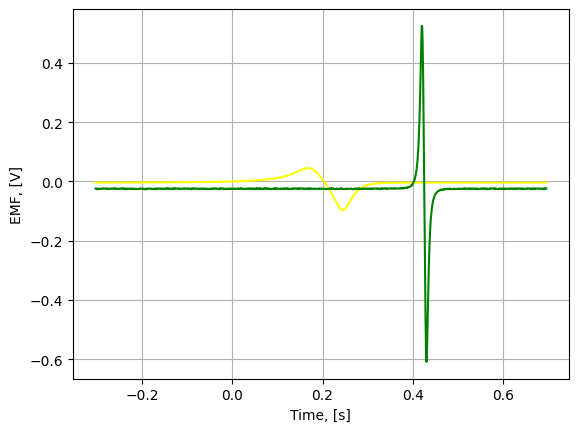

In [58]:
url = f'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab2_I/'

origin = 11e-2 #m
Windings_x = 20 # number of windings on top loop is constant

metadata = '''
# Trace, direction, N, location[cm]
0  +1 50 36
1  -1 50 36
2  +1 20 36
3  -1 20 36
4  +1 10 36
5  -1 10 36
6  +1 50 20
7  +1 50 24
8  +1 50 28
9  +1 50 32
10 +1 50 36
11 +1 50 40
12 +1 50 44
13 +1 50 48
14 +1 50 52
15 +1 50 56
16 +1 50 60
'''
trace, direction, windings_y, location = np.loadtxt(metadata.split('\n'), dtype=int, unpack=True)
location = location /100 #cm->m
windings_x = Windings_x * direction
windings_y *= direction

def get_trace(num):
    fname = url + f'Trace%20{num:d}.csv'
    t, Vx, Vy = np.genfromtxt(fname, skip_header=2,
                              delimiter=',', usecols=(3,4,5)).T
    return t, Vx, Vy

time, Vx, Vy = get_trace(2)

plt.plot(time, Vx, color='yellow')
plt.plot(time, Vy, color='green')
plt.grid()
plt.xlabel('Time, [s]')
plt.ylabel('EMF, [V]')
plt.show();

# EMF for changing N

Trace0 ... Trace5

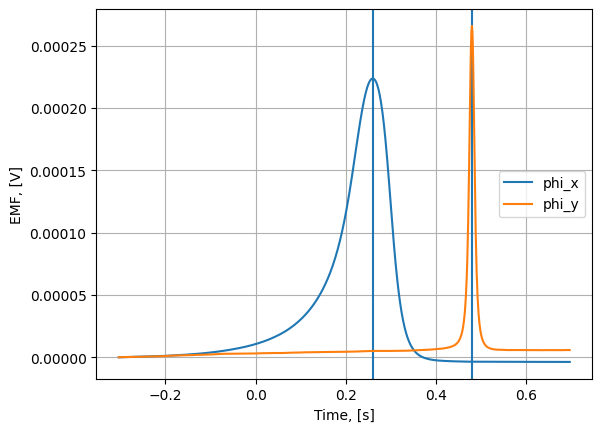

Time distance 0.22 s


In [59]:
i = 0
time, Vx, Vy = get_trace(i)
Vx -= np.mean(Vx[-10:-1]) #get rid of offset
#Vx -= np.mean(Vx[:10]) #get rid of offset
Vy -= np.mean(Vy[-10:-1])    #get rid of offset

#correct time
phi_bx = cumtrapz(Vx, time, initial=0)
phi_by = cumtrapz(Vy, time, initial=0)
t_x = time[np.argmax(np.abs(phi_bx))]
t_y = time[np.argmax(np.abs(phi_by))]
plt.axvline(t_x)
plt.axvline(t_y)


# plt.plot(time, Vx)
# plt.plot(time, Vy, label='Vy, n={:d}'.format(i))
plt.plot(time, phi_bx/windings_x[i], label='phi_x')
plt.plot(time, phi_by/windings_y[i], label='phi_y')

plt.grid()
plt.xlabel('Time, [s]')
plt.ylabel('EMF, [V]')
plt.legend(loc='center right')
plt.show()

def get_phi(t, Vx, Vy):
    Vx -= np.mean(Vx[-10:-1]) #get rid of offset
    Vy -= np.mean(Vy[-10:-1])    #get rid of offset

    phi_bx = cumtrapz(Vx, time, initial=0)
    phi_by = cumtrapz(Vy, time, initial=0)
    return phi_bx, phi_by

def get_timedist(phi_bx, phi_by):
    t_x = time[np.argmax(np.abs(phi_bx))]
    t_y = time[np.argmax(np.abs(phi_by))]
    return t_x,  t_y


t, vx, vy = get_trace(0)
phx, phy = get_phi(t, vx, vy)
tx, ty = get_timedist(phx, phy)
print(f'Time distance {ty-tx:.2f} s')

# EMF for changing h

Trace6 .. Trace16

In [60]:
h_fall = location - origin #m
t_fall = np.zeros(h_fall.size)
for i in range(17):
    t, vx , vy = get_trace(i)
    phx, phy = get_phi(t, vx, vy)
    tx, ty = get_timedist(phx, phy)
    t_fall[i] = ty - tx

t_fall, h_fall

(array([0.21979167, 0.21770833, 0.21979167, 0.21875   , 0.21875   ,
        0.21875   , 0.12916667, 0.15625   , 0.17916667, 0.20104167,
        0.21979167, 0.23854167, 0.25520833, 0.27291666, 0.284375  ,
        0.29895833, 0.3125    ]),
 array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.09, 0.13, 0.17, 0.21, 0.25,
        0.29, 0.33, 0.37, 0.41, 0.45, 0.49]))

# Linear approximation

$$ {h \over t} = v_0 + a t$$

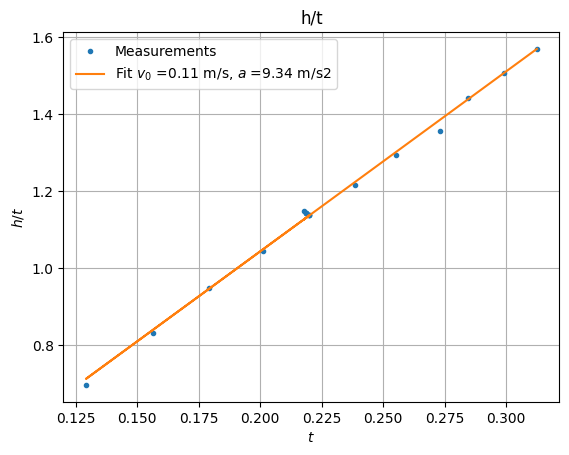

In [61]:
plt.plot(t_fall, h_fall/t_fall, '.', label='Measurements')

fit = linregress(t_fall, h_fall/t_fall)
v_0 = fit.intercept
acc = fit.slope * 2

plt.plot(t_fall, fit.slope*t_fall + fit.intercept, label=rf'Fit $v_0$ ={v_0:.2f} m/s, $a$ ={acc:.2f} m/s2')
plt.xlabel(r'$t$')
plt.ylabel(r'$h/t$')
plt.grid()
plt.legend()
plt.title('h/t')

plt.show();

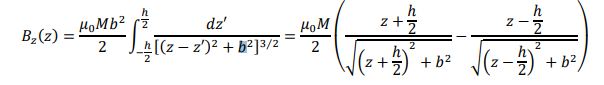

 Magnetization calculated from scope data M (3.242+/-0.009)e+05 [A/m]
 Magnetization taken by Teslameter M (8.70+/-0.07)e+05 [A/m]


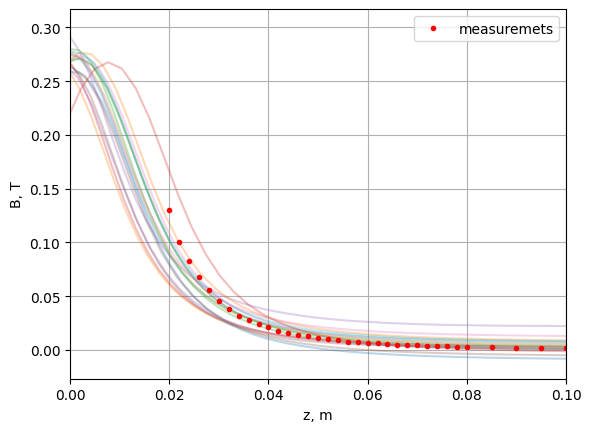

In [62]:
h = 2e-2 # m length of magnet
b = 1e-2 #m radius of magnet
d = 35e-3 #m, diameter slil A, B
A = np.pi*d*d/4
mu0 = scipy.constants.mu_0


M = []
for i in range(0, 17):

    t, vx , vy = get_trace(i)
    phx, phy = get_phi(t, vx, vy)
    tx, ty = get_timedist(phx, phy)

    t = t - tx # set time to zero when the magnet passes loop x

    filter = t > 0
    t = t[filter]
    phx = phx[filter]
    phy = phy[filter]

    B_ = phy / windings_y[i]  /A
    z_ = v_0 * t + acc* t**2 /2 - h_fall[i]
    dist_dependence = geometric_factor(z_)

    reg = linregress(dist_dependence, B_*2 / mu0)
    M_reg = ufloat(reg.slope, reg.stderr)
    M.append(M_reg)
    #plt.plot(z_, dist_dependence*M_reg2, 'b--', label='model' )
    plt.plot(z_, B_, alpha=0.3)


#plt.legend()
plt.xlabel('z, m')
plt.ylabel('B, T')
#plt.ylim(-0.01, .2)
plt.xlim(0, .1)
plt.plot(z_measured, B_measured, 'r.', label='measuremets')
plt.legend()
plt.grid()

Magnetization = np.array(M).mean()
print(f' Magnetization calculated from scope data M {Magnetization:.1ue} [A/m]')
print(f' Magnetization taken by Teslameter M {M_measured:.1ue} [A/m]')